# Metoda Metropolisa

Rozkład próbkowany - to nieunormowany rozkład normalny. 
Celem całkowania tego rozkładu jest wyznaczenie stałej normującej go do 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean = 0 
std_dev = 1

def rozkład(x):
    return np.exp(-0.5*((x - mean)/std_dev)**2)

In [3]:
# Punkt startowy
x_aktualny = -2   

# Inicjalizacja licznika akceptowanych próbek
zakceptowane_probki = 0

n = 1000000
probki = []

# Pętla algorytmu Metropolisa-Hastingsa
for _ in range(n):
    # Generowanie x_proponowany z rozkładu normalnego
    x_proponowany = x_aktualny + np.random.normal(0, 0.02)  
    wspolczynnik_akceptacji = rozkład(x_proponowany) / rozkład(x_aktualny)

    # Losowa decyzja o akceptacji lub odrzuceniu propozycji
    if np.random.uniform(0, 1) <= wspolczynnik_akceptacji:
         x_aktualny = x_proponowany
         zakceptowane_probki += 1
         probki.append(x_aktualny)
probki[0:5]

[-2.028850465885802,
 -2.0587005950273385,
 -2.03831745876439,
 -2.055790415778353,
 -2.005400836955223]

In [4]:
Calka =  zakceptowane_probki / n
print("Przybliżona wartość całki:", Calka)

Przybliżona wartość całki: 0.993688


# Wykresy

Dzielenie listy próbek przez Całka, w celu unormowania: \
a) tworzę pustą listę na próbki unormowane przez całkę  \
b) dzielę każdy element listy 'probki' przez 'Calka' \
c) dodaję do listy 'probki_unormowane'

In [5]:
probki_normowane = []
for element in probki:
    probki_normowane.append(element / Calka)
probki_normowane[0:5]

[-2.041737915609127,
 -2.0717776555894187,
 -2.051265043720353,
 -2.068848990607065,
 -2.0181393324214674]

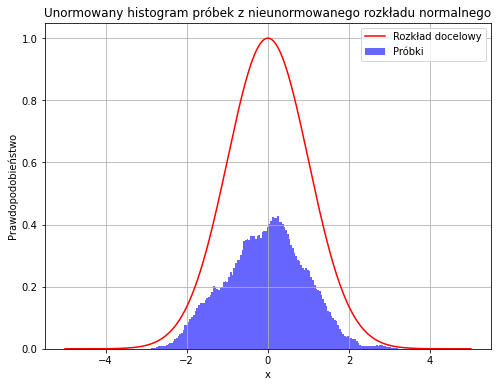

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(probki_normowane, bins=150, density=True, alpha=0.6, color='blue', label='Próbki')
x_zakres = np.linspace(-5, 5, 1000)
plt.plot(x_zakres, rozkład(x_zakres), color='red', label='Rozkład docelowy')
plt.title('Unormowany histogram próbek z nieunormowanego rozkładu normalnego')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo')
plt.legend()
plt.grid(True)
plt.show()